In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

C:\Users\yuvraj khanna\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df=pd.read_csv('train.csv')
dft=pd.read_csv('test.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Visualization 

In [4]:
df['Product_Category_2']=df['Product_Category_2'].fillna(0)
df['Product_Category_3']=df['Product_Category_3'].fillna(0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Data Preprocessing

In [6]:
ar=itemgetter(2,3,5,6)(df.columns)
for i in ar:
    z=0
    for each in df[i].unique():
        df.replace({
            i:{each:z}
        },inplace=True)
        z=z+1
        

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969


In [8]:
X=df.drop(['User_ID','Product_ID','Purchase'],axis=1)
Y=df['Purchase']

In [9]:
poly=PolynomialFeatures(degree=3)
X=poly.fit_transform(X)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

# Plots for Visualization

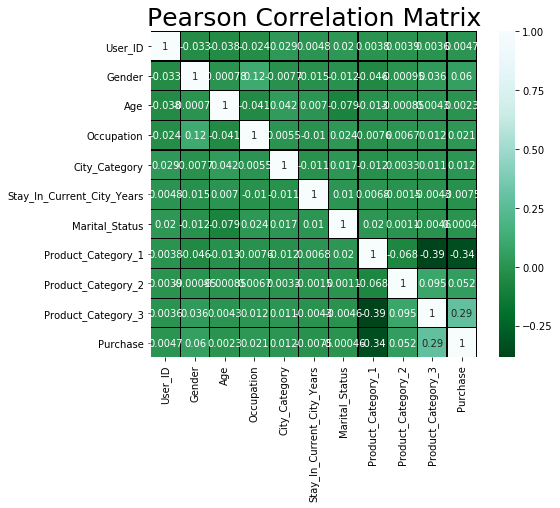

In [11]:
features=['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase']
f, ax = plt.subplots(figsize=(8,6))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', annot=True)

C:\Users\yuvraj khanna\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


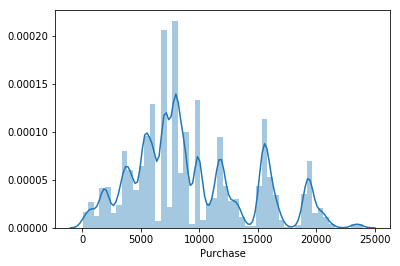

In [12]:
sns.distplot(df['Purchase'])

# Base Model

In [13]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)

In [14]:
def rmse(y,ypred):
    return(np.sqrt(sum((y-ypred)*(y-ypred))/len(y)))

In [15]:
print(rmse(Y_test,pred))

4179.183187005626


In [16]:
reg.score(X_test,Y_test)

0.3099390483959039

# Base Model Submission

In [17]:
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [18]:
dft.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [19]:
dft['Product_Category_2']=df['Product_Category_2'].fillna(0)
dft['Product_Category_3']=df['Product_Category_3'].fillna(0)
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,0.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,6.0,14.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,0.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,14.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,0.0,0.0


In [20]:
ar=itemgetter(2,3,5,6)(dft.columns)
for i in ar:
    z=0
    for each in dft[i].unique():
        dft.replace({
            i:{each:z}
        },inplace=True)
        z=z+1
        

In [21]:
X_test=dft.drop(['User_ID','Product_ID'],axis=1)

In [22]:
poly=PolynomialFeatures(degree=3)
X_test=poly.fit_transform(X_test)

In [23]:
pred=reg.predict(X_test)

In [24]:
print(pred)

[13605.21284373  9797.73343449  6167.59123218 ... 12779.52984095
 11103.19275224  7369.69389606]


In [25]:
dfans=pd.DataFrame({
    'Prediction':pred
})

In [26]:
dfans.to_csv('predictions.csv')

# Feature Engineering


In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969


In [28]:
maxdr={}
for each in df['Product_ID'].unique():
    maxdr[each]=0
for each in dft['Product_ID'].unique():
    maxdr[each]=0
for each in range(len(df['Product_ID'])):
    if df['Purchase'][each]>maxdr[df['Product_ID'][each]]:
        maxdr[df['Product_ID'][each]]=df['Purchase'][each]

In [29]:
mindr={}
for each in df['Product_ID'].unique():
    mindr[each]=100000000000
for each in dft['Product_ID'].unique():
    mindr[each]=100000000000
for each in range(len(df['Product_ID'])):
    if df['Purchase'][each]<mindr[df['Product_ID'][each]]:
        mindr[df['Product_ID'][each]]=df['Purchase'][each]

In [30]:
X=df.drop(['User_ID','Product_ID','Purchase','Marital_Status'],axis=1)
Y=df['Purchase']

In [31]:
product_ID_max=[]
product_ID_min=[]
for each in range(len(df['Product_ID'])):
    product_ID_max.append(maxdr[df['Product_ID'][each]])
for each in range(len(df['Product_ID'])):
    product_ID_min.append(mindr[df['Product_ID'][each]])

In [32]:
df['product_ID_max']=product_ID_max
df['product_ID_min']=product_ID_min
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_ID_max,product_ID_min
0,1000001,P00069042,0,0,10,0,0,0,3,0.0,0.0,8370,13716,2648
1,1000001,P00248942,0,0,10,0,0,0,1,6.0,14.0,15200,19701,3880
2,1000001,P00087842,0,0,10,0,0,0,12,0.0,0.0,1422,1776,343
3,1000001,P00085442,0,0,10,0,0,0,12,14.0,0.0,1057,1778,365
4,1000002,P00285442,1,1,16,1,1,0,8,0.0,0.0,7969,10073,3920


# Final RMSE


In [33]:
X=df.drop(['User_ID','Product_ID','Purchase'],axis=1)
Y=df['Purchase']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
reg=LinearRegression()
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)
print(rmse(Y_test,pred))

3007.5892594905017


# Submission of Test Case

In [34]:
i=0
sum=0
for each in maxdr.keys():
    if maxdr[each] != 0:
        sum=sum+maxdr[each]
        i=i+1
max_mean=sum/i
for each in dft['Product_ID'].unique():
    if maxdr[each] == 0:
        maxdr[each]=max_mean

i=0
sum=0
for each in mindr.keys():
    if mindr[each] != 100000000000:
        sum=sum+maxdr[each]
        i=i+1
min_mean=sum/i
for each in dft['Product_ID'].unique():
    if mindr[each] == 100000000000:
        mindr[each]=min_mean

In [35]:
product_ID_max=[]
product_ID_min=[]
for each in range(len(dft['Product_ID'])):
    product_ID_max.append(maxdr[dft['Product_ID'][each]])
for each in range(len(dft['Product_ID'])):
    product_ID_min.append(mindr[dft['Product_ID'][each]])

In [36]:
dft['product_ID_max']=product_ID_max
dft['product_ID_min']=product_ID_min
dft.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,product_ID_max,product_ID_min
0,1000004,P00128942,0,0,7,0,0,1,1,0.0,0.0,19708.0,3933.0
1,1000009,P00113442,0,1,17,1,1,0,3,6.0,14.0,13714.0,3077.0
2,1000010,P00288442,1,2,1,0,2,1,5,0.0,0.0,8900.0,1734.0
3,1000010,P00145342,1,2,1,0,2,1,4,14.0,0.0,3526.0,813.0
4,1000011,P00053842,1,1,1,1,3,0,4,0.0,0.0,3556.0,684.0


In [37]:
X_test=dft.drop(['User_ID','Product_ID'],axis=1)
pred=reg.predict(X_test)
dfans=pd.DataFrame({
    'Prediction':pred
})
dfans.to_csv('predictions.csv')